In [1]:
!pip install mglearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 540 kB 8.7 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=905e4d663e05b1e02e3da377b796b42a32fcb9f524d455189c7af2bada373c36
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, ward
import mglearn

In [6]:
x, y = make_blobs(n_samples=100 ,n_features=3, random_state=0)
agc = AgglomerativeClustering(n_clusters=2)
agc.fit(x)

AgglomerativeClustering()

[0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0
 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 1 1 1 0]


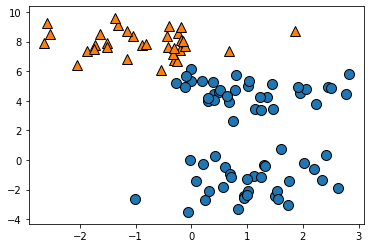

In [11]:
result = agc.fit_predict(x)
print(result)
mglearn.discrete_scatter(x[:, 0], x[:, 1], result)

In [12]:
def plot_dendrogram(model, ax, **kwargs):
    #モデルをlinkage matrixに変換して、scipyのdendrogramで描画
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, ax=ax, **kwargs)

model_ward = AgglomerativeClustering(n_clusters=None, 
                                distance_threshold=0,
                                )
model_ward.fit(x)

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

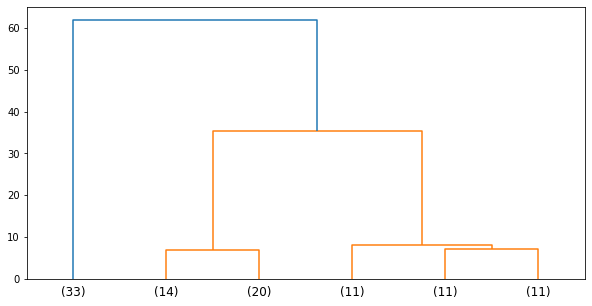

In [39]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_dendrogram(model_ward, ax=ax, truncate_mode='lastp', p=6)
fig.show()

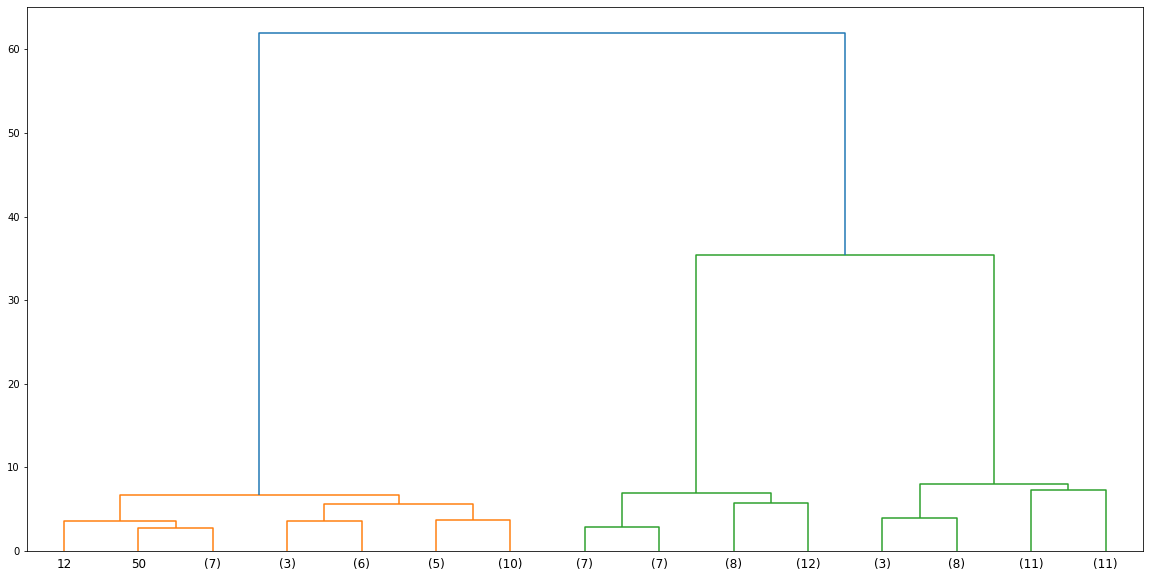

In [40]:
fig, ax = plt.subplots(figsize=(20, 10))
linkage_arr = ward(x)
truncate_mode = "level" ##したから数えてp回目の併合以降のノードを残す
#truncate_mode = "lastp" ##上から数えてp個のノードを残す
dendrogram(linkage_arr, ax=ax, truncate_mode='level',p=3)
fig.show()